# Combining weather data with electric prices.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import Data_Eng_Functions as ff

In [2]:
data_folder = r"C:/Users/Dell/Desktop/Lecture_14_11_2022/mywork2/Electric_prices_data"
df = ff.parseHTMLfiles(data_folder)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 3792 to 695
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    23040 non-null  datetime64[ns]
 1   Price   23040 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 540.0 KB


In [3]:
df.to_csv('Electric_prices.csv')

In [4]:
weather = pd.read_csv("weather_df.csv", parse_dates=['DATE'])

# Calculate an average for each hour by grouping weather data into hourly groups

In [5]:
weather = pd.read_csv("weather_df.csv", parse_dates=['DATE'])

# Correct the datetime format and load the weather data

In [6]:
wind_speeds_hourly = weather.groupby(pd.Grouper(key='DATE', freq='H'))['WIND_SPEED'].mean()
wind_speeds_hourly

DATE
2020-03-06 00:00:00    4.535294
2020-03-06 01:00:00    4.731250
2020-03-06 02:00:00    5.323529
2020-03-06 03:00:00    3.992308
2020-03-06 04:00:00    4.960000
                         ...   
2022-03-31 19:00:00    5.238462
2022-03-31 20:00:00    4.746154
2022-03-31 21:00:00    4.300000
2022-03-31 22:00:00    4.676923
2022-03-31 23:00:00    4.930769
Freq: H, Name: WIND_SPEED, Length: 18144, dtype: float64

In [7]:
df['Price'].count()
df

,Date,Price
3792,2020-03-06 00:00:00,1.70624
3793,2020-03-06 01:00:00,1.91456
3794,2020-03-06 02:00:00,1.85504
3795,2020-03-06 03:00:00,1.85876
3796,2020-03-06 04:00:00,1.89472
...,...,...
691,2022-11-01 19:00:00,37.95392
692,2022-11-01 20:00:00,41.59580
693,2022-11-01 21:00:00,27.15848
694,2022-11-01 22:00:00,23.00572


In [8]:
price_list = []
wind_speed_list=[]
data_points = min([df['Price'].count(), wind_speeds_hourly.count()])
for i in range(data_points):
    price = df['Price'].iloc[i]
    wind_speed = wind_speeds_hourly.iloc[i]
    if np.isnan(price) or np.isnan(wind_speed):

        price_list.append(price_list[-1])
        wind_speed_list.append(wind_speed_list[-1])
    else:
        price_list.append(df['Price'].iloc[i])
        wind_speed_list.append(wind_speeds_hourly.iloc[i])

# A visual representation of the correlation between datasets' prices and wind speeds

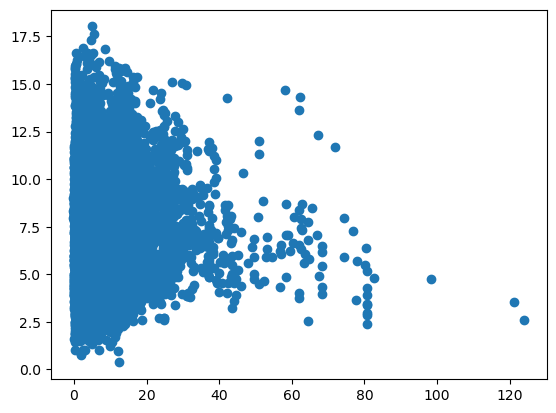

In [9]:
plt.scatter(price_list, wind_speed_list)

In [10]:
from scipy.stats.stats import pearsonr
pearsonr(price_list, wind_speed_list)

C:\Program Files\KMSpico\temp\ipykernel_1620\3557319564.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.04331084260886378, pvalue=9.200021535618966e-09)

# Dashboard of wind speed and NordPoolSpot Prices

In [10]:
from dash import dcc, html
from jupyter_dash import JupyterDash
import plotly.express as px

figures = []
colors = px.colors.qualitative.T10
figmap = px.scatter_mapbox(weather, lat="LATITUDE", lon="LONGITUDE",  hover_data=["WIND_SPEED"],
                                            hover_name="STATION",
                                            color_discrete_sequence=["blue"], zoom=3)
figmap.update_layout(mapbox_style="open-street-map")
figmap.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig = px.scatter(df, x='Date', y='Price',
                        title="NordPoolSpot Prices s/KWh", hover_data=['Price', 'Date'],
                        hover_name="Price", 
                        trendline='lowess', 
                        color_discrete_sequence = colors, trendline_options=dict(frac=0.01))
fig.update_traces(mode = 'lines')
fig.data[-1].line.color = 'red'

fig.update_traces(opacity=0.2)
fig.data[-1].name = 'Spot' 
fig.data[-1].showlegend = True

fig.add_scatter(x=df['Date'], y=wind_speed_list, line={'color': 'green'})
fig.data[-1].name = 'Wind speeds'
fig.data[-1].showlegend = True

figures.append(dcc.Graph(figure=fig, id='Prices'))
figures.append(dcc.Graph(figure=figmap))
app = JupyterDash(__name__)

app.layout = html.Div(figures)

app.run_server(mode='jupyterlab', debug=False, use_reloader=False, dev_tools_ui=True, 
              dev_tools_hot_reload =True, threaded=True, port = 8001) 


 * Running on http://127.0.0.1:8001
Press CTRL+C to quit
127.0.0.1 - - [27/Dec/2022 19:36:22] "GET /_alive_62c4fb0c-d84a-4a57-938b-7f18e60d26a6 HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:36:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:36:53] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_7_1m1670895835.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:36:53] "GET /_dash-component-suites/dash/deps/react@16.v2_7_1m1670895835.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:36:53] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_7_1m1670895835.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:36:53] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_7_1m1670895835.8.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:36:53] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_7_1m1670895835.min.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:36:53] "GET /_dash-component-suites/dash/dcc/dash_core_components.v2_7

127.0.0.1 - - [27/Dec/2022 19:41:27] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:41:30] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:41:33] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:41:36] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:41:39] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:41:42] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:41:45] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:41:48] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:41:51] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:41:54] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:41:57] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:42:00] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:42:03] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2022 19:42:06] "GET /_reload-hash HTTP/1.1